# Model Training


### 1.1. Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn, Scikit-Learn and Warnings Library.

In [3]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 2.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling Libarary
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### Import the CSV Data as Pandas Dataframe

In [5]:
df = pd.read_csv("data/StudentsPerformance.csv")

### Show Top 5 Records

In [6]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y Variables

In [7]:
X = df.drop(columns=['math score'], axis=1)

In [8]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
Y = df['math score']

In [11]:
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [12]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude = "object").columns
cat_features = X.select_dtypes(include = "object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
ob_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
[
    ("OneHotEncoder", ob_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features),
]
)

In [13]:
X = preprocessor.fit_transform(X)

In [15]:
# Separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give all metrics after model Training

In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose = False)
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) # Train Model
    
    # Make Predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test Dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)
    
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model Performance for Training Set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Square: {:.4f}".format(model_train_r2))
    
    
    print('---------------------------------------')
    
    print('Model Performance for Test Set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Square: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model Performance for Training Set
- Root Mean Squared Error: 5.3402
- Mean Absolute Error: 4.2723
- R2 Square: 0.8735
---------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 5.4214
- Mean Absolute Error: 4.2253
- R2 Square: 0.8792


Lasso
Model Performance for Training Set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Square: 0.8071
---------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Square: 0.8253


Ridge
Model Performance for Training Set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Square: 0.8743
---------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Square: 0.8806


K-Neighbors Regressor
Model Performance for Training Set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Square: 0.8555
-

### Results


In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879216
5,Random Forest Regressor,0.855280
7,CatBoosting Regressor,0.851632
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.732307


### Linear Regression

In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
Y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, Y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.92


#### Plot Y_pred and Y_test

Text(0, 0.5, 'Predicted')

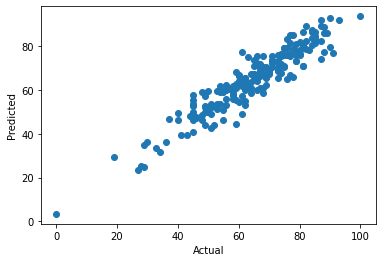

In [22]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<AxesSubplot:xlabel='math score'>

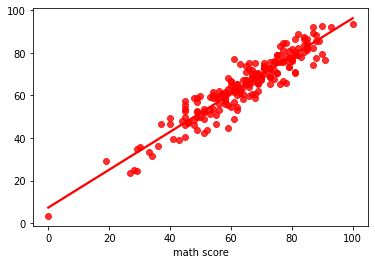

In [23]:
sns.regplot(x=Y_test, y= Y_pred, ci = None, color = 'red')

### Difference between Actual and Predicted Values

In [24]:
pred_df = pd.DataFrame({'Actual Value':Y_test, 'Predicted Value':Y_pred, 'Difference':Y_test-Y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.6250,14.3750
737,53,59.3750,-6.3750
740,80,76.5000,3.5000
660,74,76.2500,-2.2500
411,84,87.4375,-3.4375
...,...,...,...
408,52,43.8750,8.1250
332,62,62.6250,-0.6250
208,74,67.9375,6.0625
613,65,67.2500,-2.2500
